In [3]:
# Regression Practice Notebook

# 1. Data Cleaning and Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [4]:
# Load dataset
url = 'tmp/simple_regression_data.csv'  # Replace with actual path 
df = pd.read_csv(url)
print("Data head:")
print(df.head())

# Check for nulls
print("\nMissing values:")
print(df.isnull().sum())



Data head:
    Feature      Target
0  1.852278  137.096464
1  0.473592   59.002556
2 -1.230864  -76.592075
3  0.625667   60.803919
4 -0.072010   -8.886217

Missing values:
Feature    0
Target     0
dtype: int64


In [5]:
# Split the dataset
X = df[['Feature']]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 2. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)



In [7]:
# 3. MSE Calculation
mse = mean_squared_error(y_test, y_pred)
print(f"\nLinear Regression MSE: {mse:.2f}")




Linear Regression MSE: 437.55



Ridge MSE (L2): 497.33
Lasso MSE (L1): 625.91


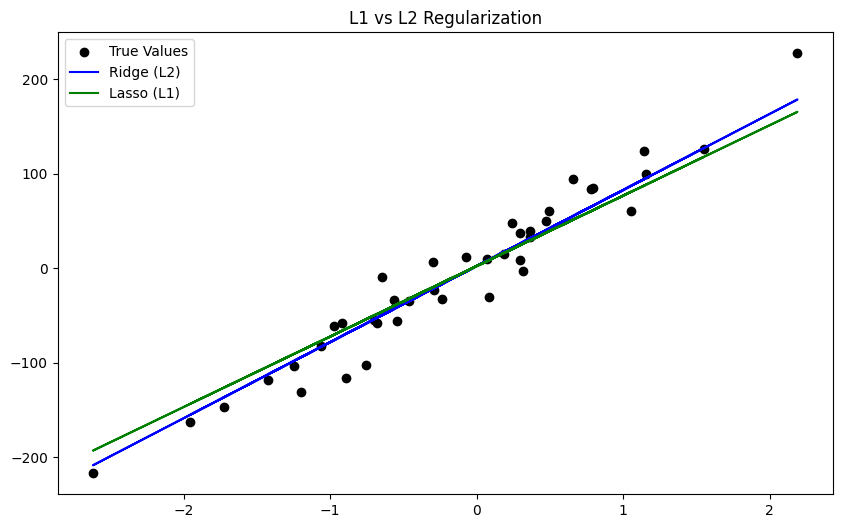


Summary:
- L1 (Lasso) can shrink coefficients to zero, good for feature selection.
- L2 (Ridge) better distributes weights and handles multicollinearity.
- L2 is generally more stable and preferred for production.



In [9]:
# 5. L1 and L2 Regularization
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)

lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)

print(f"\nRidge MSE (L2): {mse_ridge:.2f}")
print(f"Lasso MSE (L1): {mse_lasso:.2f}")

# Plot L1 vs L2
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='True Values')
plt.plot(X_test, y_ridge_pred, label='Ridge (L2)', color='blue')
plt.plot(X_test, y_lasso_pred, label='Lasso (L1)', color='green')
plt.legend()
plt.title("L1 vs L2 Regularization")
plt.show()

# 6. Why L2 for Production?
print("""
Summary:
- L1 (Lasso) can shrink coefficients to zero, good for feature selection.
- L2 (Ridge) better distributes weights and handles multicollinearity.
- L2 is generally more stable and preferred for production.
""")


In [ ]:
# Build a new classification model. Download a classification dataset from UCG
# 4. The way to build the model has more steps before the final training
# 4.1 Create a data summary table with the number of unique values, and missing values of each column, and as a % of unique values, and missing values of each column. Remove the columns based on it.
# 4.2 Create a correlation between the two features. Remove the highly correlated features.
# 4.3 Use feature selection algorithm
# 4.4 Build a regularized model
# 4.5 Build performance metrics, e.g. confusion metric, accuracy, precision, ROC etc.